In [2]:
import numpy as np
import pandas as pd

# Part 1: Data Retrieval

In [6]:
# Get Ranking and Players Data
rankings = pd.read_csv('tennis_atp-master/atp_rankings_10s.csv',header=None)
rankings.columns = ['Week','Ranking','Player ID','Points']
rankings.index = rankings['Week']
players = pd.read_csv('tennis_atp-master/atp_players.csv',header=None)
players.columns = ['Player ID','First','Last','L/R','DOB','Country']
all_point_data = pd.read_csv('All Point Data.csv',index_col=0)
point_data = all_point_data[['Challenger' not in x for x in all_point_data['Tourney']]]

In [3]:
# Get Matches and Join Tournament Date to all_point_data
match_10 = pd.read_csv('tennis_atp-master/atp_matches_2010.csv')
match_11 = pd.read_csv('tennis_atp-master/atp_matches_2011.csv')
match_12 = pd.read_csv('tennis_atp-master/atp_matches_2012.csv')
match_13 = pd.read_csv('tennis_atp-master/atp_matches_2013.csv')
match_14 = pd.read_csv('tennis_atp-master/atp_matches_2014.csv')
match_15 = pd.read_csv('tennis_atp-master/atp_matches_2015.csv')
#ch_10 = pd.read_csv('tennis_atp-master/atp_matches_qual_chall_2010.csv')
#ch_11 = pd.read_csv('tennis_atp-master/atp_matches_qual_chall_2011.csv')
#ch_12 = pd.read_csv('tennis_atp-master/atp_matches_qual_chall_2012.csv')
#ch_13 = pd.read_csv('tennis_atp-master/atp_matches_qual_chall_2013.csv')
#ch_14 = pd.read_csv('tennis_atp-master/atp_matches_qual_chall_2014.csv')
#ch_15 = pd.read_csv('tennis_atp-master/atp_matches_qual_chall_2015.csv')

all_matches = pd.concat([match_10, match_11, match_12, match_13, match_14, match_15,
                        #ch_10, ch_11, ch_12, ch_13, ch_14, ch_15
                        ],
                        axis = 0)

In [5]:
from datetime import datetime
from datetime import timedelta
def getMondayOfDate(d):
    date = datetime.strptime(str(d),'%Y%m%d')
    wd = date.weekday()
    if wd >= 5:
        date = date + timedelta(days = 7 - wd)
    elif wd == 0:
        date = date + timedelta(days = 0 - wd)
    else:
        date = date + timedelta(days = 0 - wd)
    return int(date.strftime('%Y%m%d'))

In [7]:
from collections import defaultdict

tourney_results = all_matches.groupby(['tourney_name','tourney_date','surface']).count().index
unique_tourney = []
for t,d,s in tourney_results.values:
    if t[-3:] == ' CH':
        t = t[:-3]
    elif t[-2:] == ' Q':
        t = t[:-2]
    elif t[-7:] == 'Masters':
        t = t[:-7]
    t = t.replace(" ", "")
    t = t.replace(".","")
    if d == 20131229 or d == 20131230:
        unique_tourney.append(('14',t,getMondayOfDate(d),s))
    elif d == 20121230 or d == 20121231:
        unique_tourney.append(('13',t,getMondayOfDate(d),s))
    else:
        unique_tourney.append((str(d)[2:4],t,getMondayOfDate(d),s))
tourney_dict = defaultdict(dict) # dict where the default values are dicts.
for a, b, c, d in unique_tourney: # Each tuple is "key1, key2, value"
    tourney_dict[a][b] = (c,d)

In [8]:
def getCityFromTourney(tourney):
    try:
        return re.split('[- . \d]',re.split('ATP',tourney)[1])[0] 
    except IndexError:
        print tourney
        return ""

In [9]:
def changeCityName(year, city):
    if city == 'Qatar':
        return 'Doha'
    elif city == 'QatarLive':
        return 'Doha'
    elif city == 'RioDeJaneiro':
        return 'RiodeJaneiro'
    elif city == 'Monaco':
        return 'MonteCarlo'
    elif city == 's':
        return 's-Hertogenbosch'
    elif city == 'WashingtonD':
        return 'Washington'
    elif city == 'Montreal' or city == 'Toronto':
        return 'Canada'
    elif city == 'Winston' or city == 'WinstonSalem':
        return 'Winston-Salem'
    elif city == 'St':
        return 'StPetersburg'
    elif city == 'StPetersburgOpen':
        return 'StPetersburg'
    elif city == 'StudenaCroatiaOpen':
        return 'Umag'
    elif city == 'WorldTourFinals' or city == 'London':
        return 'TourFinals'
    elif int(year) <= 13 and (city == 'VinadelMar' or city == 'VinaDelMar'):
        return 'Santiago'
    elif int(year) == 14 and city == 'Santiago':
        return 'VinadelMar'
    elif city == 'HoustonClayCourtChampionship':
        return 'Houston'
    elif city == 'QueensClubLondon':
        return 'Queen\'sClub'
    elif city == 'Oeiras':
        return 'Estoril'
    elif city == 'Dusseldorf' and int(year) == 13:
        return 'PowerHorseCup'
    elif 'ChallengeTour' in city or 'ChallenegerTour' in city:
        return ''
    else:
        return city

In [10]:
import re
city_map = [getCityFromTourney(x) for x in point_data['Tourney'].values]
tourney_data = [tourney_dict[str(x)][changeCityName(x,y)][0] if changeCityName(x,y) != '' else ''
                for x,y in zip(point_data['Year'].values, city_map)] 
surface_data = [tourney_dict[str(x)][changeCityName(x,y)][1] if changeCityName(x,y) != '' else ''
                for x,y in zip(point_data['Year'].values, city_map)] 
point_data['Tourney Week'] = tourney_data
point_data['Surface'] = surface_data

PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseWorldTeamCup
PowerHorseW

/Users/haroldmli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haroldmli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
def cleanPlayerNames(name):
    if name in ['Albert Ramos Vinolas','Albert Ramos  Vinolas']:
        return 'Albert Ramos'
    elif name == 'Aleksandr Nedovesov':
        return 'Aleksandr Nedovyesov'
    elif name in ['Alex Bogomolov  Jr','Alex Jr. Bogomolov']:
        return 'Alex Bogomolov Jr'
    elif name == 'Aljax Bedene':
        return 'Aljaz Bedene'
    elif name in ['Andrei Kuznetsov', 'Andrey kumantsov']:
        return 'Andrey Kuznetsov'
    elif name == 'Blav Kavcic':
        return 'Blaz Kavcic'
    elif name == 'Cedric Marcel Stebe':
        return 'Cedrik Marcel Stebe'
    elif name == 'Dennis Kudla':
        return 'Denis Kudla'
    elif name in ['Diego Schwartzman','Diego Sebastian Schwartman']:
        return 'Diego Sebastian Schwartzman'
    elif name == 'Eilas Ymer':
        return 'Elias Ymer'
    elif name == 'Ernest Gulbis':
        return 'Ernests Gulbis'
    elif name == 'Federico Del Bonis':
        return 'Federico Delbonis'
    elif name == 'Frances Tiafoe':
        return 'Francis Tiafoe'
    elif name in ['Izak Van der Merwe', 'Izak van der Merwe']:
        return 'Izak Van Der Merwe'
    elif name == 'Jan Herynch':
        return 'Jan Hernych'
    elif name == 'Joao Olavo Souza':
        return 'Joao Souza'
    elif name == 'Juan Martin del Potro':
        return 'Juan Martin Del Potro'
    elif name == 'Kei Nishkori':
        return 'Kei Nishikori'
    elif name in ['Kenny de Schepper', 'Kenny De Scheper']:
        return 'Kenny De Scheper'
    elif name == 'Marco Trugelliti':
        return 'Marco Trungelliti'
    elif name == 'Mathew Ebden':
        return 'Matthew Ebden'
    elif name == 'Michael Russel':
        return 'Michael Russell'
    elif name in ['Mikail Kukushkin', 'Mikhael Kukushkin']:
        return 'Mikhail Kukushkin'
    elif name in ['Ricardas Barankis','Richard Berankis','Ricardas Bernakis']:
        return 'Ricardas Berankis'
    elif name in ['Rogerio Dutra DA Silva', 'Rogerio Dutra Da Silva']:
        return 'Rogerio Dutra Silva'
    elif name == 'Stan Wawrinka':
        return 'Stanislas Wawrinka'
    elif name in ['Teimuraz Gabashvili','Teymuraz Gabashvilli']:
        return 'Teymuraz Gabashvili'
    elif name == 'Thiemo de Bakker':
        return 'Thiemo De Bakker'
    elif name =='Thomasz Bellucci':
        return 'Thomaz Bellucci'
    elif name == 'Victor Estrella Burgos':
        return 'Victor Estrella'
    elif name in ['Victor Troicki','Vikor Troicki']:
        return 'Viktor Troicki'
    elif name == 'Dmitry Tursonov':
        return 'Dmitry Tursunov'
    elif name == 'Julian Benneteau':
        return 'Julien Benneteau'
    elif name == 'Mikhail Youhzny':
        return 'Mikhail Youzhny'
    elif name == 'Nick Krygios':
        return 'Nick Kyrgios'
    elif name == 'Philipp Kohlschrieber':
        return 'Philipp Kohlschreiber'
    elif name == 'Ranier Schuettler':
        return 'Rainer Schuettler'
    elif name in ['Roberta Bautista Agut', 'Roberto Batista Agut']:
        return 'Roberto Bautista Agut'
    elif name == 'Sam Groth':
        return 'Samuel Groth'
    elif name == 'Sergei Stakhovsky':
        return 'Sergiy Stakhovsky'
    elif name == 'Tatsumo Ito':
        return 'Tatsuma Ito'
    elif name == 'Tim Smyzek':
        return 'Tim Smyczek'
    elif name == 'Yen Hsun LU':
        return 'Yen Hsun Lu'
    elif name in ['Jarkko Niemenen', 'Jarko Nieminen']:
        return 'Jarkko Nieminen'
    else:
        return name.replace('-',' ')

In [12]:
point_data_tourney = pd.DataFrame(point_data[point_data['Tourney Week'] != ''])
point_data_tourney['Player 1'] = [cleanPlayerNames(x) for x in point_data_tourney['Player 1']]
point_data_tourney['Player 2'] = [cleanPlayerNames(x) for x in point_data_tourney['Player 2']]

In [13]:
players['Name'] = [str(x) + ' ' + str(y) for x,y in zip(players['First'],players['Last'])]

In [14]:
all_data_plus_1 = pd.merge(left=point_data_tourney,right=players, how='left', 
                           left_on='Player 1', right_on='Name', suffixes = ('_pt','_1'))
all_data_plus_2 = pd.merge(left=all_data_plus_1,right=players, how='left', 
                           left_on='Player 2', right_on='Name', suffixes = ('_1','_2'))
all_data_plus_3 = pd.merge(left=all_data_plus_2, right=rankings,how='left',
                           left_on=['Player ID_1','Tourney Week'],
                           right_on=['Player ID','Week'], suffixes = ('_1','_1R'))
all_data_plus_4 = pd.merge(left=all_data_plus_3, right=rankings,how='left',
                           left_on=['Player ID_2','Tourney Week'],
                           right_on=['Player ID','Week'], suffixes = ('_1R','_2R'))

In [15]:
def rankingGroup(rank1, rank2, server):
    if server == 1:
        x1, x2 = rank1, rank2
    elif server == 2:
        x1, x2 = rank2, rank1
    return classifyRank(x1) + ' vs. ' + classifyRank(x2)

In [16]:
def classifyRank(num):
    if num <= 4:
        return str(num)
    elif num <= 10:
        return "5-10"
    elif num <= 20:
        return "11-20"
    elif num <= 50:
        return '21-50'
    elif num <= 100:
        return '51-100'
    else:
        return 'Outside Top 100'

In [17]:
all_data_plus_4['Ranking Matchup'] = [rankingGroup(x,y,z) for x,y,z in 
                                      zip(all_data_plus_4['Ranking_1R'],
                                          all_data_plus_4['Ranking_2R'],
                                          all_data_plus_4['Server'])]

In [18]:
full_data = all_data_plus_4[~(np.isnan(all_data_plus_4['Ranking_2R']) | np.isnan(all_data_plus_4['Ranking_1R']) |
    np.isnan(all_data_plus_4['Player ID_1']) | np.isnan(all_data_plus_4['Player ID_2']))]

In [19]:
missing_data = all_data_plus_4[(np.isnan(all_data_plus_4['Ranking_2R']) | np.isnan(all_data_plus_4['Ranking_1R']) |
    np.isnan(all_data_plus_4['Player ID_1']) | np.isnan(all_data_plus_4['Player ID_2']))]

# Part 2: Grouping Data to Use in Predictive Model

In [20]:
game_states = {
    (0,0): 'Start of Game',
    (15,0): '15-0',
    (0,15): '0-15',
    (15,15): '15-15',
    (30,0): '30-0',
    (0,30): '0-30',
    (30,15): '30-15',
    (15,30): '15-30',
    (30,30): '30-30',
    (40,0): '40-0',
    (0,40): '0-40',
    (40,15): '40-15',
    (15,40): '15-40',
    (40,30): '40-30',
    (30,40): '30-40',
    (40,40): '40-40',
    (45,40): 'AD-40',
    (40,45): '40-AD',
}

In [21]:
coordinate_states = {
    'Start of Game': (0,0),
    'Server 15-0': (1,1),
    'Server 0-15': (1,-1),
    'Server 15-15': (2,0),
    'Server 30-0': (2,2),
    'Server 0-30': (2,-2),
    'Server 30-15': (3,1),
    'Server 15-30': (3,-1),
    'Server 30-30': (4,0),
    'Server 40-0': (3,3),
    'Server 40-15': (4,2),
    'Server 40-30': (5,1),
    'Server 0-40': (3,-3),
    'Server 15-40': (4,-2),
    'Server 30-40': (5,-1),
    'Server 40-40': (6,0),
    'Server AD-40': (7,1),
    'Server 40-AD': (7,-1)
}

In [22]:
def tiebreak_state(state):
    p1,p2, serving = state

    if p1 >= 6 and p2 >= 6:
        if p1 > p2:
            p1, p2 = 7,6
        elif p1 < p2:
            p1, p2 = 6,7
        else:
            p1, p2 = 6,6
    
    if ((p1+p2) % 4 == 1) or ((p1+p2) % 4 == 2):
        if serving == 'Serving':
            suffix = ' (R)'
        else:
            suffix = ' (S)'
    else:
        if serving == 'Serving':
            suffix = ' (S)'
        else:
            suffix = ' (R)'
        
    if p1 >= 6 and p2 >=6:
        if p1 > p2:
            return '7-6' + suffix
        elif p1 < p2:
            return '6-7' + suffix
        else:
            return '6-6' + suffix
    else:
        return str(p1)+'-'+str(p2) + suffix

    

In [23]:
def tiebreak_coordinates(game_state):
    if game_state not in coordinate_states.keys():
        #print game_state#[7:]
        g1, g2 = game_state[7:].split('-')
        #print g1, g2
        return (int(g1)+int(g2), int(g1)-int(g2))
    else:
        return coordinate_states[game_state]

In [24]:
def get_win_pct_data(score_state_all, score_state_sum, matchup_exists = True):
    all_results = []
    for matchup, set_score, game_score, game_state in score_state_all.index.values:   
        try:
            x, y = tiebreak_coordinates(game_state)
            if game_score == '6-6':
                if x % 4 == 1 or x % 4 == 2:
                    all_results.append((matchup, set_score,game_score,'Serving',game_state[7:]+ ' (R)', 
                                1.0*float(score_state_sum.loc[(matchup, set_score, game_score, game_state, True)])/
                                float(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                x, y))
                else:
                    all_results.append((matchup, set_score,game_score,'Serving',game_state[7:]+ ' (S)', 
                                1.0*float(score_state_sum.loc[(matchup, set_score, game_score, game_state, True)])/
                                float(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                x, y))
            elif 'Server' in game_state:
                all_results.append((matchup, set_score,game_score,'Serving',game_state[7:], 
                                1.0*float(score_state_sum.loc[(matchup, set_score, game_score, game_state, True)])/
                                float(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                x, y))
            else:
                all_results.append((matchup, set_score,game_score,'Serving',game_state, 
                                1.0*float(score_state_sum.loc[(matchup, set_score, game_score, game_state, True)])/
                                float(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                x, y))

            if 'Start of Game' not in game_state:
                score1, score2 = game_state[7:].split('-')
                new_score = score2+'-'+score1   
            else:
                new_score = game_state

            if game_score == 'Up 1 from 6-6 5th Set':
                newgscore = 'Down 1 from 6-6 5th Set'
            elif game_score == 'Down 1 from 6-6 5th Set':
                newgscore = 'Up 1 from 6-6 5th Set'
            elif game_score == 'All Square from 6-6 5th Set':
                newgscore = game_score
            else:
                gscore1, gscore2 = game_score.split('-')
                newgscore = gscore2+'-'+gscore1

            sscore1, sscore2 = set_score.split('-')
            newsscore = sscore2+'-'+sscore1

            if game_score == '6-6':
                if x % 4 == 1 or x % 4 == 2:
                    new_score = new_score + ' (S)'
                else:
                    new_score = new_score + ' (R)'
            
            if matchup_exists:
                m1, m2 = matchup.split(' vs. ')
                newmatchup = m2 + ' vs. ' + m1
            else:
                newmatchup = matchup

            all_results.append((newmatchup, newsscore,newgscore,'Returning',new_score, 
                                1.0 - 1.0*float(score_state_sum.loc[(matchup, set_score, game_score, game_state, True)])/
                                float(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]),
                                x, -1*y))
        except KeyError:
            #print 'Key Error at ' + str((matchup, set_score, game_score, game_state))
            x, y = tiebreak_coordinates(game_state)
            if game_score == '6-6':
                if x % 4 == 1 or x % 4 == 2:
                    all_results.append((matchup, set_score, game_score, 'Serving',game_state[7:]+ ' (R)', 0.,
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]), x, y))
                else:
                    all_results.append((matchup, set_score, game_score, 'Serving',game_state[7:]+ ' (S)', 0.,
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]), x, y))
            elif 'Server' in game_state:
                all_results.append((matchup, set_score, game_score, 'Serving',game_state[7:], 0.,
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]), x, y))
            else:
                all_results.append((matchup, set_score, game_score, 'Serving',game_state, 0.,
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]), x, y))

            #print game_state
            if 'Start of Game' not in game_state:
                score1, score2 = game_state[7:].split('-')
                new_score = score2+'-'+score1   
            else:
                new_score = game_state

            if game_score == 'Up 1 from 6-6 5th Set':
                newgscore = 'Down 1 from 6-6 5th Set'
            elif game_score == 'Down 1 from 6-6 5th Set':
                newgscore = 'Up 1 from 6-6 5th Set'
            elif game_score == 'All Square from 6-6 5th Set':
                newgscore = game_score
            else:
                gscore1, gscore2 = game_score.split('-')
                newgscore = gscore2+'-'+gscore1
            sscore1, sscore2 = set_score.split('-')
            newsscore = sscore2+'-'+sscore1

            if game_score == '6-6':
                if x % 4 == 1 or x % 4 == 2:
                    new_score = new_score + ' (S)'
                else:
                    new_score = new_score + ' (R)'
            
            if matchup_exists:
                m1, m2 = matchup.split(' vs. ')
                newmatchup = m2 + ' vs. ' + m1
            else:
                newmatchup = matchup

            all_results.append((newmatchup, newsscore, newgscore, 'Returning',new_score, 1.,
                                int(score_state_all.loc[(matchup, set_score,game_score,game_state)]), x, -1*y))
    return all_results

In [83]:
def setup_real_data(full_data):
    score_state_all = pd.DataFrame(full_data.groupby\
                                    (['Ranking Matchup',
                                      'Set Score Server View',
                                      'Game Score Server View', 
                                      'Game State New']).count()['Player 1'])
    score_state_sum = pd.DataFrame(full_data.groupby\
                                   (['Ranking Matchup',
                                     'Set Score Server View',
                                     'Game Score Server View', 
                                     'Game State New', 
                                     'Server Winner']).count()['Player 1'])
    all_results = get_win_pct_data(score_state_all, score_state_sum, matchup_exists = True)
    sum_data = pd.DataFrame(all_results,columns=['Matchup','Set Score','Game Score',
                                  'Serving at Start of Game?','Point Score','% Win',
                                  'Number of Instances','Points Elapsed','Y'])
    sum_data.index = sum_data['Set Score'] + sum_data['Game Score'] + \
                     sum_data['Serving at Start of Game?'] + sum_data['Point Score'] + \
                     sum_data['Matchup']
    return sum_data

In [84]:
def setup_prior_data():
    prior_data = pd.read_csv('Match_Probs_50_50.csv',index_col=0)
    prior_data.index = prior_data['Set Score'] + prior_data['Game Score'] + \
                       prior_data['Serving?'] + prior_data['Point Score']
    return prior_data

In [85]:
def setup_matchup_data(sum_data):
    matchup_data = pd.DataFrame(sum_data[(sum_data['Set Score'] == '0-0') & 
                                         (sum_data['Game Score'] == '0-0') &
                                         (sum_data['Point Score'] == 'Start of Game')])
    matchup_data['Win Instances'] = matchup_data['% Win'] * matchup_data['Number of Instances']
    matchup_sum = matchup_data.groupby('Matchup').sum()[['Win Instances','Number of Instances']]
    return matchup_sum

In [86]:
def setup_surface_data(full_data):
    surface_state_all = pd.DataFrame(full_data.groupby\
                                    (['Surface',
                                      'Set Score Server View',
                                      'Game Score Server View', 
                                      'Game State New']).count()['Player 1'])
    surface_state_sum = pd.DataFrame(full_data.groupby\
                                   (['Surface',
                                     'Set Score Server View',
                                     'Game Score Server View', 
                                     'Game State New', 
                                     'Server Winner']).count()['Player 1'])
    surface_results = get_win_pct_data(surface_state_all, surface_state_sum, matchup_exists = False)
    surface_data = pd.DataFrame(surface_results,columns=['Surface','Set Score','Game Score',
                                      'Serving at Start of Game?','Point Score','% Win',
                                      'Number of Instances','Points Elapsed','Y'])
    surface_data.index = surface_data['Set Score'] + surface_data['Game Score'] + \
                         surface_data['Serving at Start of Game?'] + surface_data['Point Score'] + \
                         surface_data['Surface']
    return surface_data

In [87]:
def setup_h2h_data(all_matches):
    all_ids = np.unique(np.concatenate((np.unique(all_matches['winner_id']),
                                        np.unique(all_matches['loser_id'])),axis = 0))
    h2h_data = pd.DataFrame(0,index=all_ids, columns = all_ids)

    all_h2h = pd.DataFrame(all_matches.groupby(['winner_id','loser_id']).count()['tourney_id'])
    for key,row in all_h2h.iterrows():
        winner_id, loser_id = key
        #print row['tourney_id']
        h2h_data.ix[winner_id, loser_id] = row['tourney_id']
    return h2h_data

In [88]:
def setup_all_datasets(full_data, all_matches, datecutoff):
    
    full_data = full_data[(full_data['Week_1R'] < datecutoff) &
                          (full_data['Week_2R'] < datecutoff)]
    all_matches = all_matches[all_matches['tourney_date'] < datecutoff]
    
    prior_data = setup_prior_data()
    real_data = setup_real_data(full_data)
    matchup_data = setup_matchup_data(real_data)
    surface_data = setup_surface_data(full_data)
    h2h_data = setup_h2h_data(all_matches)
    return prior_data, real_data, matchup_data, surface_data, all_matches, h2h_data

# Part 3: Learn Predictive Model

In [89]:
def get_posterior(prior_data, real_data, matchup_data, point_param = 10, matchup_param = 10):
    new_data = []
    all_matchups = np.unique(real_data['Matchup'])
    max_pt_data = np.log(prior_data['Number of Instances'].max()) + 2
    max_matchup_data = np.log(matchup_data['Number of Instances'].max()) + 2
            
    for i,row in prior_data.iterrows():
        if i % 100 == 0:
            print i
            
        tot = (np.log(row['Number of Instances']) + 2) / max_pt_data * point_param
        prior_alpha = tot * row['% Win']
        prior_beta = tot * (1. - row['% Win'])
        
        for j in all_matchups:
            m_win, m_instance = matchup_data.loc[j].values
            mtot = (np.log(m_instance) + 2) / max_matchup_data * matchup_param
            prior_alpha_2 = prior_alpha + mtot * m_win / m_instance
            prior_beta_2 = prior_beta + mtot * (1. - m_win / m_instance)
            
            idx = row['Set Score']+row['Game Score']+ \
                  row['Serving?']+row['Point Score']+j
            #print idx
            if idx in real_data.index.values:
                row_data = real_data.ix[idx,['% Win','Number of Instances']]
                #print row_data.values
                pct_win, instances = row_data.values
                #print pct_win, instances
                real_alpha = int(round(pct_win * instances,0))
                real_beta = instances - real_alpha
            else:
                real_alpha, real_beta = 0,0              

            new_data.append((j, row['Set Score'], row['Game Score'], 
                            row['Serving?'], row['Point Score'], 
                            prior_alpha_2 + real_alpha, prior_beta_2 + real_beta))

                
    return pd.DataFrame(new_data,columns=['Matchup','Set Score','Game Score',
                                          'Serving at Start of Game?','Point Score',
                                          'Alpha','Beta'])

In [32]:
import matplotlib
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

def graph_posterior(new_data, matchup, setscore, gamescore, serving, pointscore, show=True):
    a, b = new_data[(new_data['Set Score'] == setscore) &
                           (new_data['Game Score'] == gamescore) &
                           (new_data['Serving at Start of Game?'] == serving) &
                           (new_data['Point Score'] == pointscore) &
                           (new_data['Matchup'] == matchup)]\
                           [['Alpha','Beta']].values[0]
    print (a, b, round(100.*a/(a+b),2))
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(beta.ppf(0.01, a, b),
                    beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b),
            'r-', lw=5, alpha=0.6, label='beta pdf')
    if show:
        plt.show()

In [33]:
from dateutil.relativedelta import relativedelta
def recent_activity(player_id, d2, data, months, surface=None):
    enddate = datetime.strptime(str(d2),'%Y%m%d')
    begindate = enddate + relativedelta(months = -1*months)
    d1 = int(begindate.strftime('%Y%m%d'))
    #print d1, d2
    if surface == None:
        wins = len(data[(data['tourney_date'] >= d1) & 
                        (data['tourney_date'] < d2) &
                        (data['winner_id'] == player_id)])
        losses = len(data[(data['tourney_date'] >= d1) & 
                        (data['tourney_date'] < d2) &
                        (data['loser_id'] == player_id)])
    else:
        wins = len(data[(data['tourney_date'] >= d1) & 
                        (data['tourney_date'] < d2) &
                        (data['winner_id'] == player_id) &
                        (data['surface'] == surface)])
        losses = len(data[(data['tourney_date'] >= d1) & 
                        (data['tourney_date'] < d2) &
                        (data['loser_id'] == player_id) &
                        (data['surface'] == surface)])
    return wins, losses

In [911]:
def get_posterior_spec(prior_data, real_data, matchup_data, surface_data, all_matches, h2h_data, base_data,
                       matchup, setscore, gamescore, serving, pointscore, surface, 
                       players = None, date = None, months = None,
                       point_param = 10, matchup_param = 10, s_param = 10,
                       r_param = 2, h2h_param = 10, base_param = 100,
                       show=True, return_estimate=True):
    
    max_pt_data = np.log(prior_data['Number of Instances'].max()) + 2
    max_matchup_data = np.log(matchup_data['Number of Instances'].max()) + 2
    max_s_data = np.log(surface_data['Number of Instances'].max()) + 2
    max_h2h_data = h2h_data.max(skipna = True).max()
    
    real_data.index = real_data['Set Score'] + real_data['Game Score'] + \
                      real_data['Serving at Start of Game?'] + real_data['Point Score'] + \
                      real_data['Matchup']
    
    # 0) Base Data based on Probability Model
    m1, m2 = matchup.split(' vs. ')
    bwin = base_data.loc[m1][m2]
    s1, s2 = setscore.split('-')
    g1, g2 = gamescore.split('-')
    if pointscore == 'Start of Game':
        p1, p2 = '0', '0'
    else:
        p1, p2 = pointscore.split('-')
    if serving == 'Serving':
        bprob = master_win_prob(int(s1), int(s2), int(g1), int(g2), p1, p2, bwin)
    else:
        bprob = 1. - master_win_prob(int(s2), int(s1), int(g2), int(g1), p2, p1, 1.-bwin)
    print 'Base Prob: ' + str(bprob)
    prior_alpha_0 = base_param * bprob
    prior_beta_0 = base_param * (1.-bprob)
    
    # 1) Prior Data Containing Overall Point Matchup
    row = prior_data.loc[setscore + gamescore + serving + pointscore]
            
    tot = (np.log(row['Number of Instances']) + 2) / max_pt_data * point_param
    prior_alpha = tot * row['% Win']
    prior_beta = tot * (1. - row['% Win'])
    
    # 2) Prior Data Containing Overall Matchup Situation
    m_win, m_instance = matchup_data.loc[matchup].values
    mtot = (np.log(m_instance) + 2) / max_matchup_data * matchup_param
    prior_alpha_2 = mtot * m_win / m_instance
    prior_beta_2 = mtot * (1. - m_win / m_instance)
    
    # 3) Surface Data Containing Surface + Point Situation
    if setscore + gamescore + serving + pointscore + surface in surface_data.index:
        srow = surface_data.loc[setscore + gamescore + serving + pointscore + surface]
        stot = (np.log(srow['Number of Instances']) + 2) / max_s_data * s_param
        prior_alpha_3 = stot * srow['% Win']
        prior_beta_3 = stot * (1. - srow['% Win'])
    else:
        prior_alpha_3, prior_beta_3 = 0.,0.
    
    # 4) Recent Form Data
    if players != None:
        p1, p2 = players
        p1win, p1loss = recent_activity(p1, date, all_matches, months, surface = surface)
        p2win, p2loss = recent_activity(p2, date, all_matches, months, surface = surface)
        #print 'Player 1 Win Loss: ' + str((p1win, p1loss))
        #print 'Player 2 Win Loss: ' + str((p2win, p2loss))
        scale1 = 1.*(p1win+p1loss)/(100.*months/12.) * r_param
        scale2 = 1.*(p2win+p2loss)/(100.*months/12.) * r_param
        
        prior_alpha_4 = 1.*p1win/max(p1win+p1loss,1)*scale1 + 1.*p2loss/max(p2win+p2loss,1)*scale2
        prior_beta_4 = 1.*p1loss/max(p1win+p1loss,1)*scale1 + 1.*p2win/max(p2win+p2loss,1)*scale2
        
        #print prior_alpha_4, prior_beta_4
        
    else:
        prior_alpha_4, prior_beta_4 = 0., 0.
        
    # 5) H2H Data
    if players != None:
        p1, p2 = players
        if p1 in h2h_data.index and p2 in h2h_data.index:
            p1win = h2h_data.ix[p1,p2]
            p2win = h2h_data.ix[p2,p1]
        else:
            p1win, p2win = 0., 0.
        #print 'H2H: ' + str((p1win, p2win))
        prior_alpha_5 = 1.*p1win/max_h2h_data * h2h_param
        prior_beta_5 = 1.*p2win/max_h2h_data * h2h_param
        
        #print prior_alpha_5, prior_beta_5
    else:
        prior_alpha_5, prior_beta_5 = 0., 0.
    
    
    # 5) New Data Containing Point + Matchup
    idx = setscore + gamescore + serving + pointscore + matchup
    if idx in real_data.index.values:
        row_data = real_data.ix[idx,['% Win','Number of Instances']]
        pct_win, instances = row_data.values
        real_alpha = int(round(pct_win * instances,0))
        real_beta = instances - real_alpha
    else:
        real_alpha, real_beta = 0,0
        
    a = prior_alpha_0 + prior_alpha + prior_alpha_2 + prior_alpha_3 + prior_alpha_4 + prior_alpha_5 + real_alpha
    b = prior_beta_0 + prior_beta + prior_beta_2 + prior_beta_3 + prior_beta_4 + prior_beta_5 + real_beta

    if show:
        print (a, b, round(100.*a/(a+b),2),round(100*beta.ppf(0.5, a, b),2))
        fig, ax = plt.subplots(1, 1)
        x = np.arange(0,1,0.001)
        ax.plot(x, beta.pdf(x, a, b),
                'r-', lw=3, label='beta pdf')
        ax.plot((beta.ppf(0.16, a, b),beta.ppf(0.16, a, b)),
                (0.,beta.pdf(beta.ppf(0.16, a, b), a, b)),
                'r-', lw=2)
        ax.plot((beta.ppf(0.84, a, b),beta.ppf(0.84, a, b)),
                (0.,beta.pdf(beta.ppf(0.84, a, b), a, b)),
                'r-', lw=2)  
        plt.show()
    
    if return_estimate:
        estimate = beta.ppf(0.5, a, b)
        return estimate

In [913]:
get_posterior_spec(prior_data, real_data, matchup_data, surface_data, all_matches, h2h_data, matchup_grid,
                   '1.0 vs. 4.0', '0-0', '0-0', 'Serving', 'Start of Game', 'Hard',
                   players = (104731,104527), date=20160729, months=3,
                   point_param = 10, 
                   matchup_param = 10, 
                   s_param = 5, r_param = 2, 
                   h2h_param = 10,
                   base_param = 100, 
                  show=False, return_estimate=True)
#get_posterior_spec(prior_data, real_data, matchup_data, surface_data, all_matches, h2h_data,
#                  '4.0 vs. 5-10', '0-1', '1-5', 'Serving', '40-AD', 'Clay')

Base Prob: 0.750410654562


0.71868166048990789

# Analyze Parameters

In [921]:
def test_parameters(full_data, all_matches, datecutoff, testnum, params,
                    training_data = None):
    
    if training_data == None:
        prior_data, real_data, matchup_data, \
        surface_data, all_matches_b, h2h_data = \
            setup_all_datasets(full_data, all_matches, datecutoff)
    else:
        prior_data, real_data, matchup_data, \
        surface_data, all_matches_b, h2h_data = training_data
    
    pbp_data_test = full_data[(full_data['Week_1R'] >= datecutoff) &
                              (full_data['Week_2R'] >= datecutoff)].sample\
                            (testnum)
    
    print 'Test Data Set Up: ' + str(len(pbp_data_test)) + ' Rows'
    point_param, matchup_param, s_param, r_param, h2h_param = params
    
    results = []
    #count = 0
    for i, row in pbp_data_test.iterrows():
        #if count % 100 == 0:
         #   print count
        #count = count + 1
        if row['Server'] == 1:
            serving = 'Serving'
        else:
            serving = 'Returning'
            
        if str(row['p1Game']) + '-' + str(row['p2Game']) == '6-6':
            point_score = tiebreak_state((row['p1Score'],row['p2Score'],
                                          serving))
        else:
            point_score = game_states[(row['p1Score'],row['p2Score'])]
        
        prob = get_posterior_spec(prior_data, real_data, matchup_data, 
                                  surface_data, all_matches, h2h_data, matchup_grid,
                                  row['Ranking Matchup'], 
                                  str(row['p1Set'])+'-'+str(row['p2Set']),
                                  str(row['p1Game'])+'-'+str(row['p2Game']), 
                                  serving, 
                                  point_score, row['Surface'],
                                  players = (int(row['Player ID_1']),
                                             int(row['Player ID_2'])), 
                                  date = datecutoff, months = 3,
                                  point_param = point_param, 
                                  matchup_param = matchup_param, 
                                  s_param = s_param, r_param = r_param, 
                                  h2h_param = h2h_param,
                                  base_param = 100,
                                  show=False, return_estimate=True)
        winner = row['Winner'] % 2
        results.append((prob, winner))
        
    return results

In [129]:
datecutoff = 20150101
count = 2000

#prior_data, real_data, matchup_data, \
surface_data, all_matches_b, h2h_data = setup_all_datasets(full_data, 
                                                           all_matches, 
                                                           datecutoff)

param_diffs = (2,5,10)

idx = 0
for p in param_diffs:
    for m in param_diffs:
        for s in param_diffs:
            for r in param_diffs:
                for h in param_diffs:
                    print idx
                    results = test_parameters(full_data, all_matches, 
                                              datecutoff, count, 
                                              (p,m,s,r,h),
                                              training_data = (prior_data, 
                                                               real_data, 
                                                               matchup_data,
                                                               surface_data, 
                                                               all_matches_b, 
                                                               h2h_data))
                        pd.DataFrame(results, columns = ['Prob','Results']).to_csv(\
                                     'Parameter Testing Results/'+str(p)+'_'+str(m)+'_'+str(s)+'_'+str(r)+\
                                      '_'+str(h)+'.csv')
                    idx = idx + 1

0
Test Data Set Up: 2000 Rows
1
Test Data Set Up: 2000 Rows
2
Test Data Set Up: 2000 Rows
3
Test Data Set Up: 2000 Rows
4
Test Data Set Up: 2000 Rows
5
Test Data Set Up: 2000 Rows
6
Test Data Set Up: 2000 Rows
7
Test Data Set Up: 2000 Rows
8
Test Data Set Up: 2000 Rows
9
Test Data Set Up: 2000 Rows
10
Test Data Set Up: 2000 Rows
11
Test Data Set Up: 2000 Rows
12
Test Data Set Up: 2000 Rows
13
Test Data Set Up: 2000 Rows
14
Test Data Set Up: 2000 Rows
15
Test Data Set Up: 2000 Rows
16
Test Data Set Up: 2000 Rows
17
Test Data Set Up: 2000 Rows
18
Test Data Set Up: 2000 Rows
19
Test Data Set Up: 2000 Rows
20
Test Data Set Up: 2000 Rows
21
Test Data Set Up: 2000 Rows
22
Test Data Set Up: 2000 Rows
23
Test Data Set Up: 2000 Rows
24
Test Data Set Up: 2000 Rows
25
Test Data Set Up: 2000 Rows
26
Test Data Set Up: 2000 Rows
27
Test Data Set Up: 2000 Rows
28
Test Data Set Up: 2000 Rows
29
Test Data Set Up: 2000 Rows
30
Test Data Set Up: 2000 Rows
31
Test Data Set Up: 2000 Rows
32
Test Data Set U

In [184]:
def analyze_results(results, bins, show_graph = True):
    bin_probs = np.zeros((bins,2))
    for prob, win in results:
        bin_probs[int(prob*bins)][0] = bin_probs[int(prob*bins)][0] + win
        bin_probs[int(prob*bins)][1] = bin_probs[int(prob*bins)][1] + 1
    
    x = list(np.arange(0.5/bins,1.,1./bins))
    all_x = list(np.arange(0.,1.,1./bins)) + [1.]

    if show_graph:
        fig, ax = plt.subplots(1, 1)
        ax.plot(x, [y[0]/y[1] for y in bin_probs],
                    'b.', ms=12)
        for k,y in zip(x,bin_probs):
            ax.plot((k,k),(k-1.96*((k*(1-k))/y[1])**0.5,k+1.96*((k*(1-k))/y[1])**0.5),
                    'g-', lw=2)
    
        for i,val in enumerate(x):
            ax.plot((val,val),(all_x[i],all_x[i+1]),'r-', lw=2)  

        ax.set_ylim(-0.05,1.05)
        ax.set_ylabel('Win Probability')
    
    error = sum([(xidx-y[0]/y[1])**2 for xidx, y in zip(x, bin_probs)])
    out_of_bounds = sum([(y[0]/y[1] > all_x[i+1]) or (y[0]/y[1] < all_x[i])
                         for i,y in enumerate(bin_probs)])
    out_of_bounds_loose = sum([(y[0]/y[1] > k+1.96*((k*(1-k))/y[1])**0.5) 
                               or (y[0]/y[1] < k-1.96*((k*(1-k))/y[1])**0.5)
                         for k,y in zip(x,bin_probs)])
    decreasing = sum([p[0]/p[1] > q[0]/q[1] 
                      for p,q in zip(bin_probs[:-1],bin_probs[1:])])
    
    return error, \
           out_of_bounds, \
           out_of_bounds_loose, \
           decreasing, \
           zip(np.round(np.arange(0.5/bins,1.,1./bins),3),
               [round(k[0]/k[1],4) for k in bin_probs],[int(k[1]) for k in bin_probs])

In [186]:
error_data = []
for p in param_diffs:
    for m in param_diffs:
        for s in param_diffs:
            for r in param_diffs:
                for h in param_diffs:
                    results = pd.read_csv('Parameter Testing Results/' + str(p)
                                          + '_' + str(m) + '_' + str(s) 
                                          + '_' + str(r) + '_' + str(h)
                                          + '.csv',
                                          index_col=0)
                    e, ob, obl, d, rd = analyze_results(results.values, 20, 
                                                       show_graph = False)
                    error_data.append(((p,m,s,r,h), e, ob, obl, d))

0.0308989212883
[(0.025000000000000001, 0.0, 1), (0.074999999999999997, 0.0294, 34), (0.125, 0.1094, 64), (0.17499999999999999, 0.1299, 77), (0.22500000000000001, 0.1858, 113), (0.27500000000000002, 0.3333, 126), (0.32500000000000001, 0.2635, 148), (0.375, 0.4138, 145), (0.42499999999999999, 0.4571, 140), (0.47499999999999998, 0.4531, 128), (0.52500000000000002, 0.5578, 147), (0.57499999999999996, 0.5649, 131), (0.625, 0.6529, 121), (0.67500000000000004, 0.7338, 139), (0.72499999999999998, 0.6864, 118), (0.77500000000000002, 0.7872, 141), (0.82499999999999996, 0.8491, 106), (0.875, 0.8923, 65), (0.92500000000000004, 1.0, 48), (0.97499999999999998, 1.0, 8)]


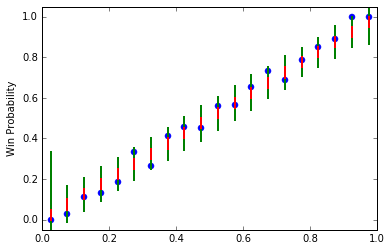

In [396]:
results = pd.read_csv('Parameter Testing Results/10_10_5_2_10.csv',
                                          index_col=0)
error, ob, d, dl, results_data = analyze_results(results.values, 20)
print error
print results_data

In [188]:
error_data.sort(key = lambda x: (x[2],x[3],x[4],x[1]))

In [189]:
error_data[:10]

[((2, 10, 2, 10, 2), 0.021973482248199148, 7, 0, 2),
 ((2, 2, 2, 5, 10), 0.024443764823894546, 7, 0, 2),
 ((10, 5, 2, 2, 2), 0.027875642519390002, 7, 0, 4),
 ((5, 2, 10, 5, 5), 0.031273719858520628, 7, 1, 3),
 ((5, 10, 5, 2, 2), 0.02769231781011525, 7, 2, 1),
 ((5, 2, 5, 5, 5), 0.031240533815170442, 7, 2, 3),
 ((2, 2, 10, 2, 2), 0.032172412555712265, 7, 2, 4),
 ((5, 2, 2, 2, 5), 0.019687728635609972, 8, 0, 3),
 ((5, 5, 10, 2, 5), 0.021890765524365675, 8, 0, 3),
 ((5, 2, 5, 5, 2), 0.023835564964773681, 8, 0, 3)]

# Present Real Data Predictions

In [415]:
import glob
def plot_matches_for_date(date, params, full_data, all_matches, 
                          rankings, surface = None, training_data = None,
                          pickle_dict = dict(), timestamp = ''):
    csv_files = glob.glob("Scraped Matches/" + date + "*_live.csv")
    for filename in csv_files:
        pickle_dict = plot_match(date, params, filename, full_data, all_matches,
                                          rankings, surface, training_data, pickle_dict, timestamp)
    return pickle_dict, 

In [1000]:
import pickle
def plot_match(date, param, filename, full_data, all_matches, 
               rankings, surface, training_data, pickle_dict = dict(),
               timestamp = ''):
    
    data = pd.read_csv(filename,index_col = 0)
    
    if len(data) > 0:
        datecutoff = int(date.replace('-',''))

        all_weeks = np.unique(rankings.index)
        rank_week = max([i for i in all_weeks if i <= datecutoff])
        rankings = rankings.loc[rank_week]
        
        try:
            r1 = classifyRank(float(rankings[rankings['Player ID'] 
                                       == data['Player 1 ID'].values[0]]
                              ['Ranking'].values[0]))
        except IndexError:
            print 'Ranking Not Found for Player 1 - assume ranking 100+'
            r1 = 'Outside Top 100'
        
        try:
            r2 = classifyRank(float(rankings[rankings['Player ID']
                                   == data['Player 2 ID'].values[0]]
                         ['Ranking'].values[0]))
        except IndexError:
            print 'Ranking Not Found for Player 2 - assuming ranking 100+'
            
            r2 = 'Outside Top 100'
        matchup = r1 + ' vs. ' + r2

        if surface == None:
            surface = data['Surface'].values[0]

        if training_data == None:
            prior_data, real_data, matchup_data, \
            surface_data, all_matches_b, h2h_data = \
                setup_all_datasets(full_data, all_matches, datecutoff)
        else:
            prior_data, real_data, matchup_data, \
            surface_data, all_matches_b, h2h_data = training_data

        print 'Data Setup Complete'

        pointparam, matchparam, sparam, rparam, h2hparam = param

        try:
            xlabels, xlabel2, xlabel3, plot_data, xticks, \
            xticks_minor, xticks_set = pickle.loads(pickle_dict[filename])
        except (IndexError,KeyError):
            xlabels, xlabel2, xlabel3, plot_data, xticks, \
            xticks_minor, xticks_set = [],[],[],[],[],[],[]

        try:
            old_data = pd.read_csv(filename.replace('_live','_archive'),index_col = 0)
            prevset, prevgame = old_data.loc[max(len(old_data) - len(data) - 1,0)]['Set Score'], \
                                old_data.loc[max(len(old_data) - len(data) - 1,0)]['Game Score']
        except IOError:
            prevset, prevgame = data['Set Score'].values[0], data['Game Score'].values[0]

        if len(xlabels) == 0:
            count = 1
        else:
            count = max(xticks) + 1

        for i,row in data.iterrows():
            if row['Game Score'] != prevgame and row['Set Score'] == prevset:
                xticks_minor.append(count)
                xlabels.append('')
                xlabel2.append('')
                xlabel3.append('')
                count = count + 1

            if row['Set Score'] != prevset:
                xticks_minor.append(count)
                xticks_set.append(count)
                xlabels.append('')
                xlabel2.append('')
                xlabel3.append('')
                count = count + 1

            if row['Game Score'] != '6-6' and row['Point Score'] == '0-0':
                row['Point Score'] = 'Start of Game'

            if row['Game Score'] == '6-6':
                p1, p2 = row['Point Score'].split('-')
                row['Point Score'] = tiebreak_state((int(p1),int(p2),
                                                     row['Serving?']))

            row['Point Score'] = row['Point Score'].replace('A','AD')

            prob = get_posterior_spec(prior_data, real_data, matchup_data, 
                                      surface_data, all_matches, h2h_data, matchup_grid,
                                      matchup, 
                                      row['Set Score'],
                                      row['Game Score'], 
                                      row['Serving?'], 
                                      row['Point Score'], surface,
                                      players = (row['Player 1 ID'],
                                                 row['Player 2 ID']), 
                                      date = datecutoff, months = 3,
                                      point_param = pointparam, 
                                      matchup_param = matchparam, 
                                      s_param = sparam, r_param = rparam, 
                                      h2h_param = h2hparam,
                                      base_param = 300,
                                      show=False, return_estimate=True)*100
            print 'New Prob: ' + str(prob)

            xlabels.append(row['Game Score'])
            xlabel2.append(row['Point Score'])
            xlabel3.append(row['Set Score'])
            xticks.append(count)

            plot_data.append(prob)

            prevset, prevgame = row['Set Score'], row['Game Score']
            count = count + 1

        p_str = pickle.dumps([xlabels, xlabel2, xlabel3, plot_data, 
                              xticks, xticks_minor, xticks_set])
        pickle_dict[filename] = p_str

        game_ticks = [(x+y)/2. for x,y in zip([0]+xticks_minor,
                                             xticks_minor + [max(xticks)])]
        game_labels = [xlabels[int(k)-1] for k in game_ticks]

        set_ticks = [(x+y)/2. for x,y in zip([0]+xticks_set,
                                             xticks_set + [max(xticks)])]
        set_labels = [xlabel3[int(k)-1] for k in set_ticks]

        fig, ax = plt.subplots(figsize=(30, 15))
        ax.plot(xticks, plot_data, marker='o', color='g', lw=7, ms=20)
        ax.plot(xticks, [100.-z for z in plot_data], marker='o', color='r', lw=7, ms=20)
        ax2 = ax.twiny()

        ax.set_xticks(game_ticks)
        ax.set_xticks(xticks_minor, minor=True)
        ax.set_xticklabels(game_labels)
        ax.set_xlim(0,max(xticks)+1)

        ax.tick_params(axis='x', labelsize=30)
        ax.tick_params(axis='y', labelsize=37)
        ax.set_ylabel('Win Percentage\n', fontsize = 35)
        ax.set_ylim(0,100)
        ax.plot((0,max(xticks)),(50,50), linestyle = '--', alpha = 0.7, 
                lw = 1.5, color = 'k')
        for val in xticks_minor:
            ax.plot((val,val),(0,100), linestyle = '--', alpha = 0.7, 
                    lw = 1.5, color = 'k')

        for val in xticks_set:
            ax.plot((val,val),(0,100), linestyle = '-', alpha = 0.9, 
                    lw = 2.25, color = 'k')

        for x,y1,y,y2 in zip(xticks[1:-1], plot_data[:-2], 
                       plot_data[1:-1], plot_data[2:]):
            if y - y1 > 3 and y - y2 > 3:
                ax.annotate(xlabel2[x-1].replace('Start of Game','0-0'), 
                                xy=(x, y + 4), fontsize = 30,
                                horizontalalignment='center', 
                                verticalalignment='center')
            elif y1 - y > 3 and y2 - y > 3:
                ax.annotate(xlabel2[x-1].replace('Start of Game','0-0'), 
                                xy=(x, y - 4), fontsize = 30,
                                horizontalalignment='center', 
                                verticalalignment='center')

        s1, s2 = row['Set Score'].split('-')
        g1, g2 = row['Game Score'].split('-')
        if s1 > s2 or (s1 == s2 and g1 > g2):
            title_update = row['Player 1'][:-3] + ' Leads ' + xlabel3[-1] + ' ' + \
                           xlabels[-1] + ' ' + xlabel2[-1]
        elif s1 == s2 and g1 == g2:
            title_update = 'Tied at ' + xlabel3[-1] + ' ' + \
                           xlabels[-1] + ' ' + xlabel2[-1]
        else:
            if xlabel2[-1] == 'Start of Game':
                plabel = xlabel2[-1]
            else:
                plabel = xlabel2[-1].split('-')[1] + '-' + xlabel2[-1].split('-')[0]
            schange = xlabel3[-1].split('-')[1] + '-' + xlabel3[-1].split('-')[0] + ' ' + \
                      xlabels[-1].split('-')[1] + '-' + xlabels[-1].split('-')[0] + ' ' + plabel
            title_update = row['Player 2'][:-3] + ' Leads ' + schange
                      
        
        ax.set_title('\n' + row['Player 1'] + ' vs. ' + row['Player 2'] + timestamp + '\n' +
                     title_update + '\n\n', fontsize=45)
        ax.grid( 'off', axis='x' )
        ax.grid( 'off', axis='x', which='minor' )
        ax.tick_params( axis='x', which='minor', length=30 )
        ax.tick_params( axis='x', which='major', bottom='off', top='off' )

        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(set_ticks)
        ax.set_xticks(xticks_set, minor=True)
        ax2.set_xticklabels(set_labels)
        ax2.tick_params(axis='x', labelsize=30)

        plt.tight_layout()
        plt.subplots_adjust(top=0.80, bottom = 0.125, left = 0.15, right = 0.875)
        plt.savefig(filename[:-4]+'.png')
        plt.show()
    
    check = pd.DataFrame([[1]])
    check.to_csv(filename.replace('_live','_updated'))
    
    remove_live = pd.DataFrame(columns = ['Player 1', 'Player 1 ID',
                                          'Player 2', 'Player 2 ID',
                                          'Set Score', 'Game Score', 
                                          'Point Score', 'Serving?'])
    remove_live.to_csv(filename)
    
    return pickle_dict

In [991]:
import time
def track_live_scores(full_data, all_matches, param, seconds, t_data = None):
    datestr = str(datetime.today().strftime('%Y-%m-%d'))
    dateint = int(datestr.replace('-',''))
    
    if t_data == None:
        prior_data, real_data, matchup_data, \
        surface_data, all_matches_b, h2h_data = \
            setup_all_datasets(full_data, all_matches, dateint)
    
        training_data = (prior_data, real_data, matchup_data, surface_data,
                         all_matches_b, h2h_data)
    else:
        training_data = t_data
    
    start = time.time()
    end = time.time()
    pickle_data = dict()
    
    while end - start < seconds:
        print 'Updating Graphs'
        tstamp = ' at ' + str(datetime.now().hour) + ':' + str(datetime.now().minute) + \
                 ':' + str(datetime.now().second)
        pickle_data = plot_matches_for_date(datestr, param, full_data, all_matches, 
                                            rankings, surface = 'Hard',
                                            training_data = training_data,
                                            pickle_dict = pickle_data,
                                            timestamp = tstamp)
        concatenate_images()
        time.sleep(10)
        end = time.time()

Updating Graphs
Ranking Not Found for Player 1 - assume ranking 100+
Data Setup Complete
Base Prob: 0.514291252846
New Prob: 50.3621990217


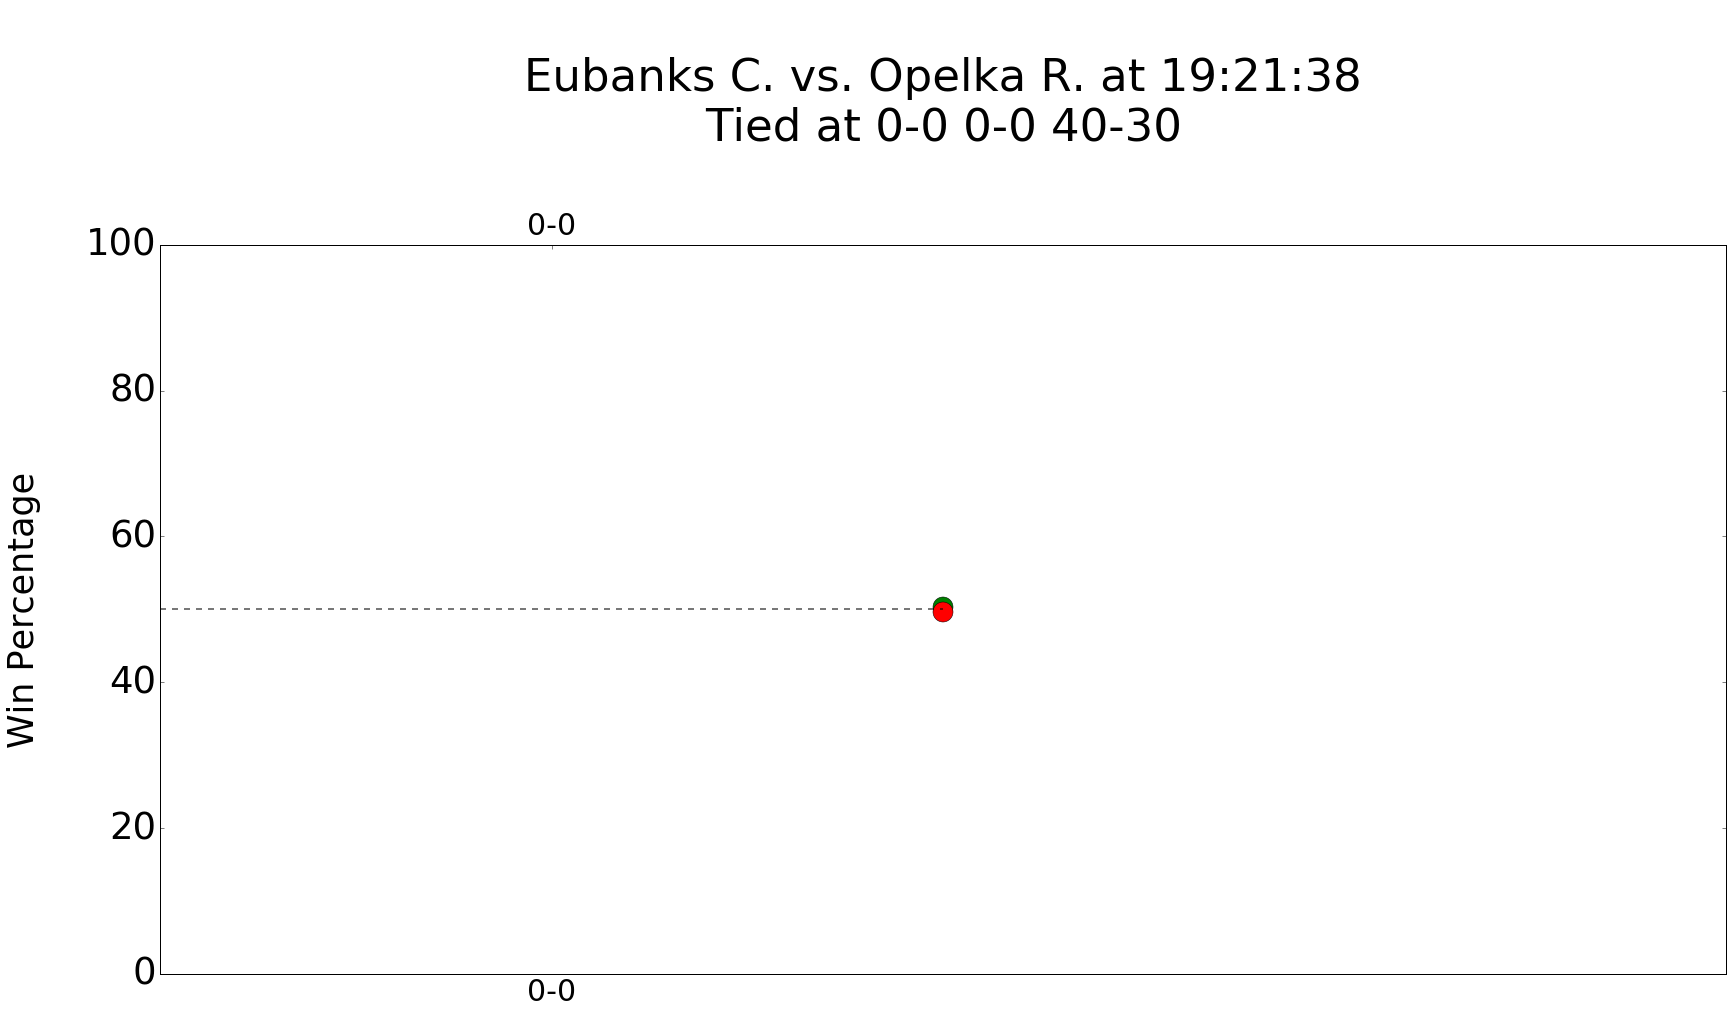

Updating Graphs
Ranking Not Found for Player 1 - assume ranking 100+
Data Setup Complete
Base Prob: 0.526553686109
New Prob: 54.3755656635


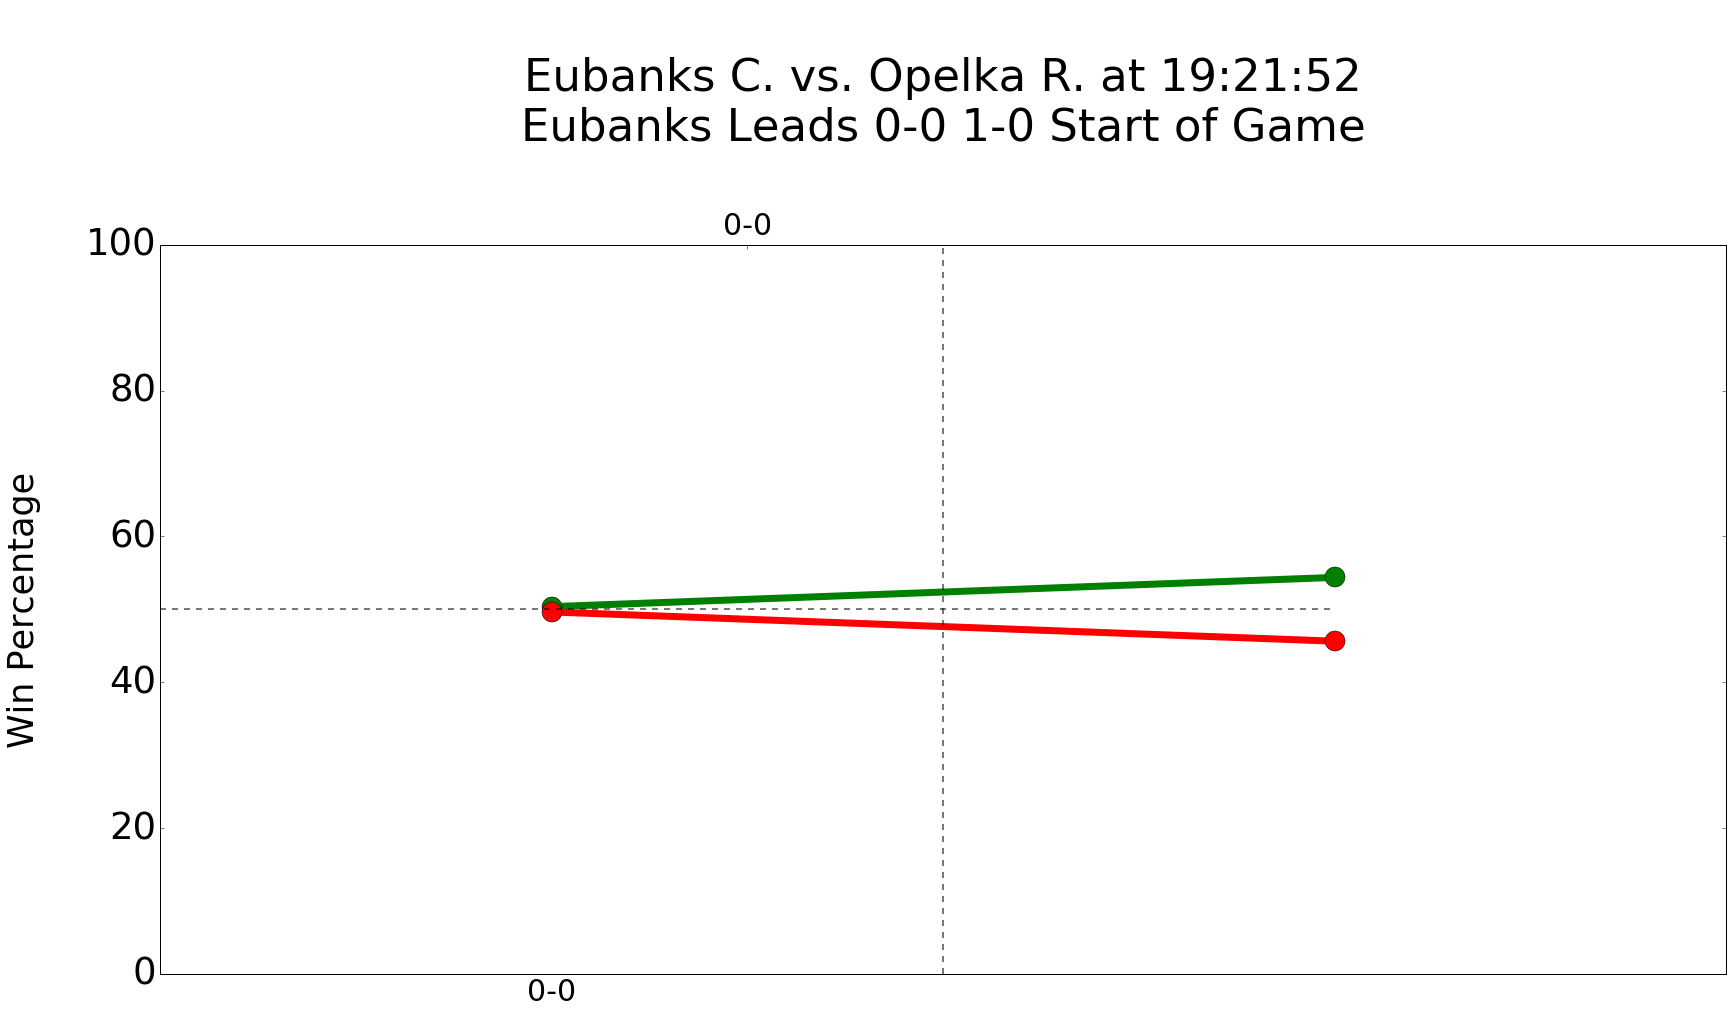

Updating Graphs
Updating Graphs
Updating Graphs
Updating Graphs
Updating Graphs
Ranking Not Found for Player 1 - assume ranking 100+
Data Setup Complete
Base Prob: 0.514767188537
New Prob: 51.995487794


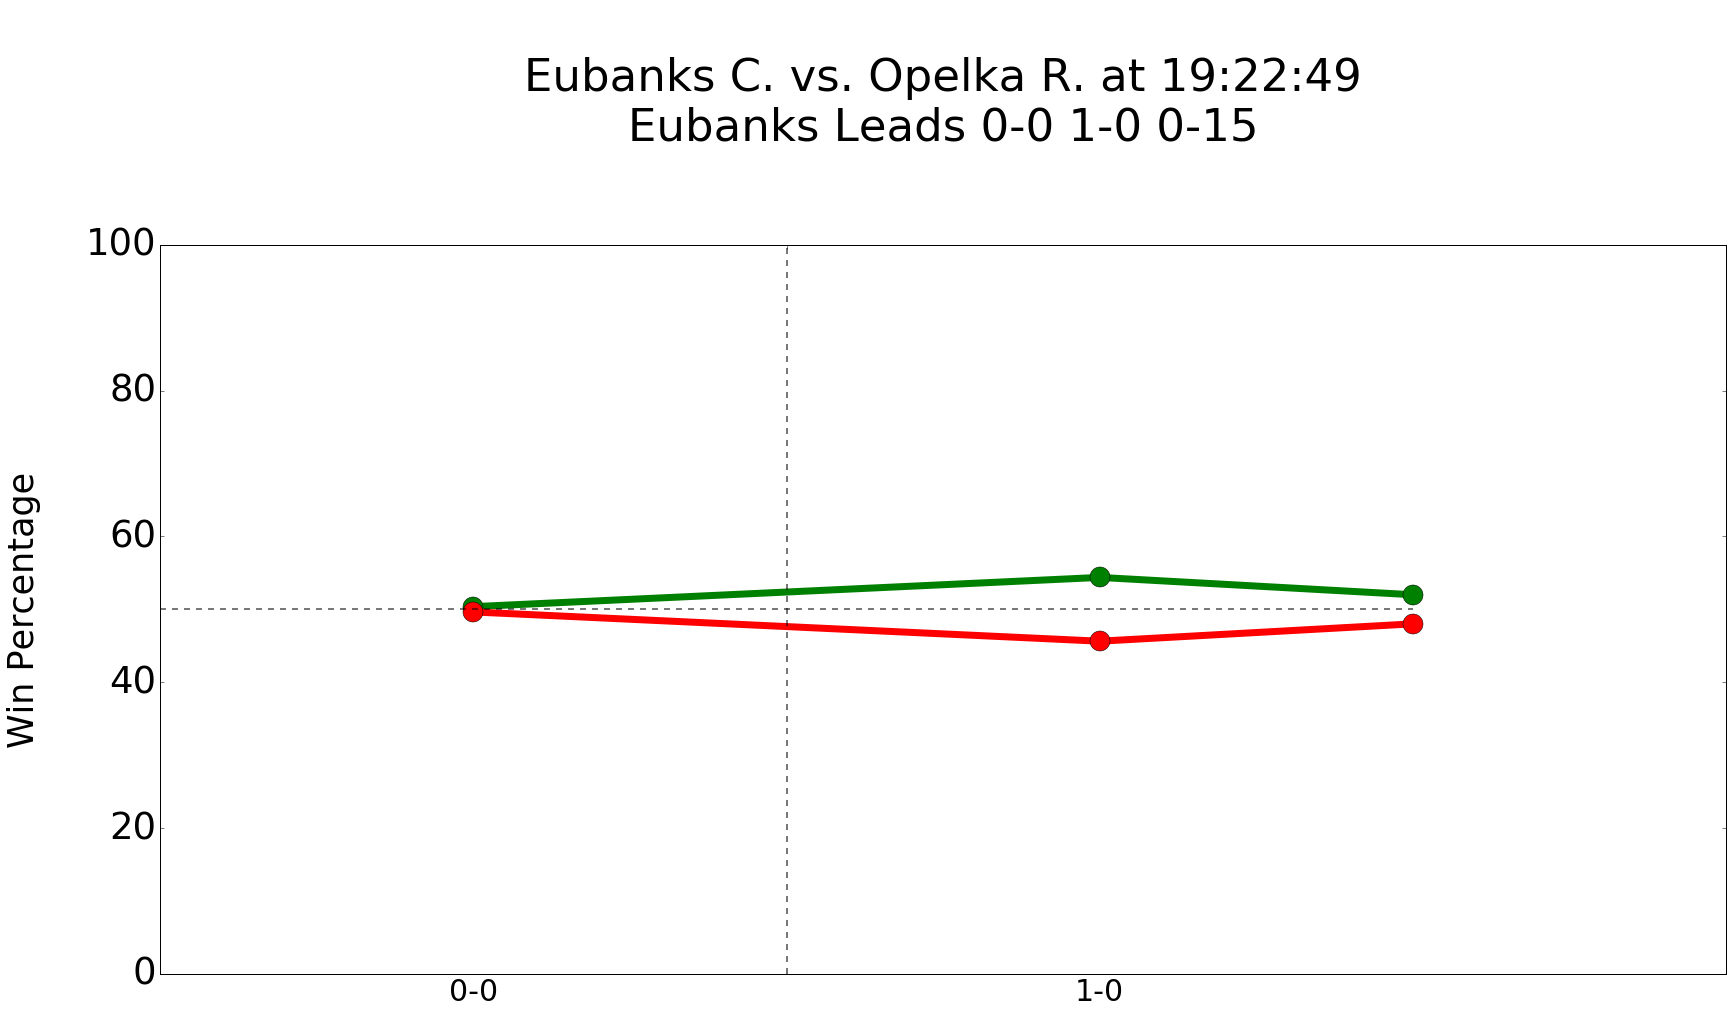

Updating Graphs
Updating Graphs
Ranking Not Found for Player 1 - assume ranking 100+
Data Setup Complete
Base Prob: 0.506244644139
New Prob: 50.8832400166


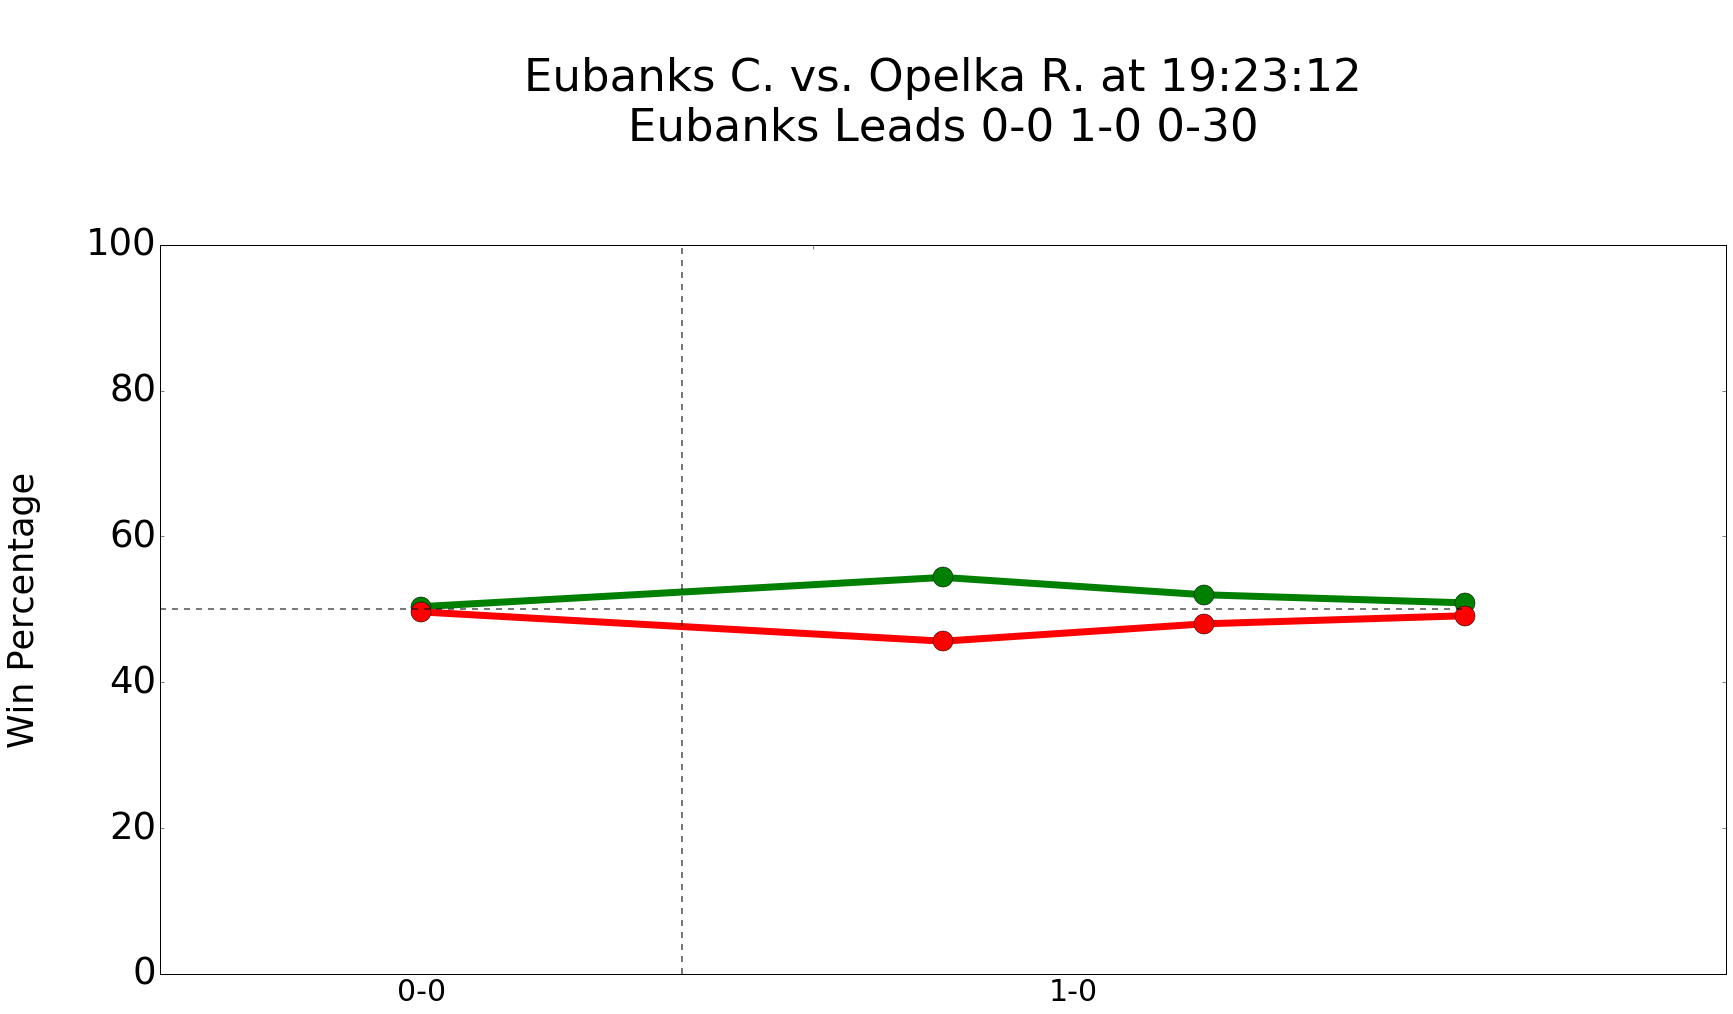

Updating Graphs
Updating Graphs
Updating Graphs
Ranking Not Found for Player 1 - assume ranking 100+
Data Setup Complete
Base Prob: 0.51505213683
New Prob: 52.1570968662


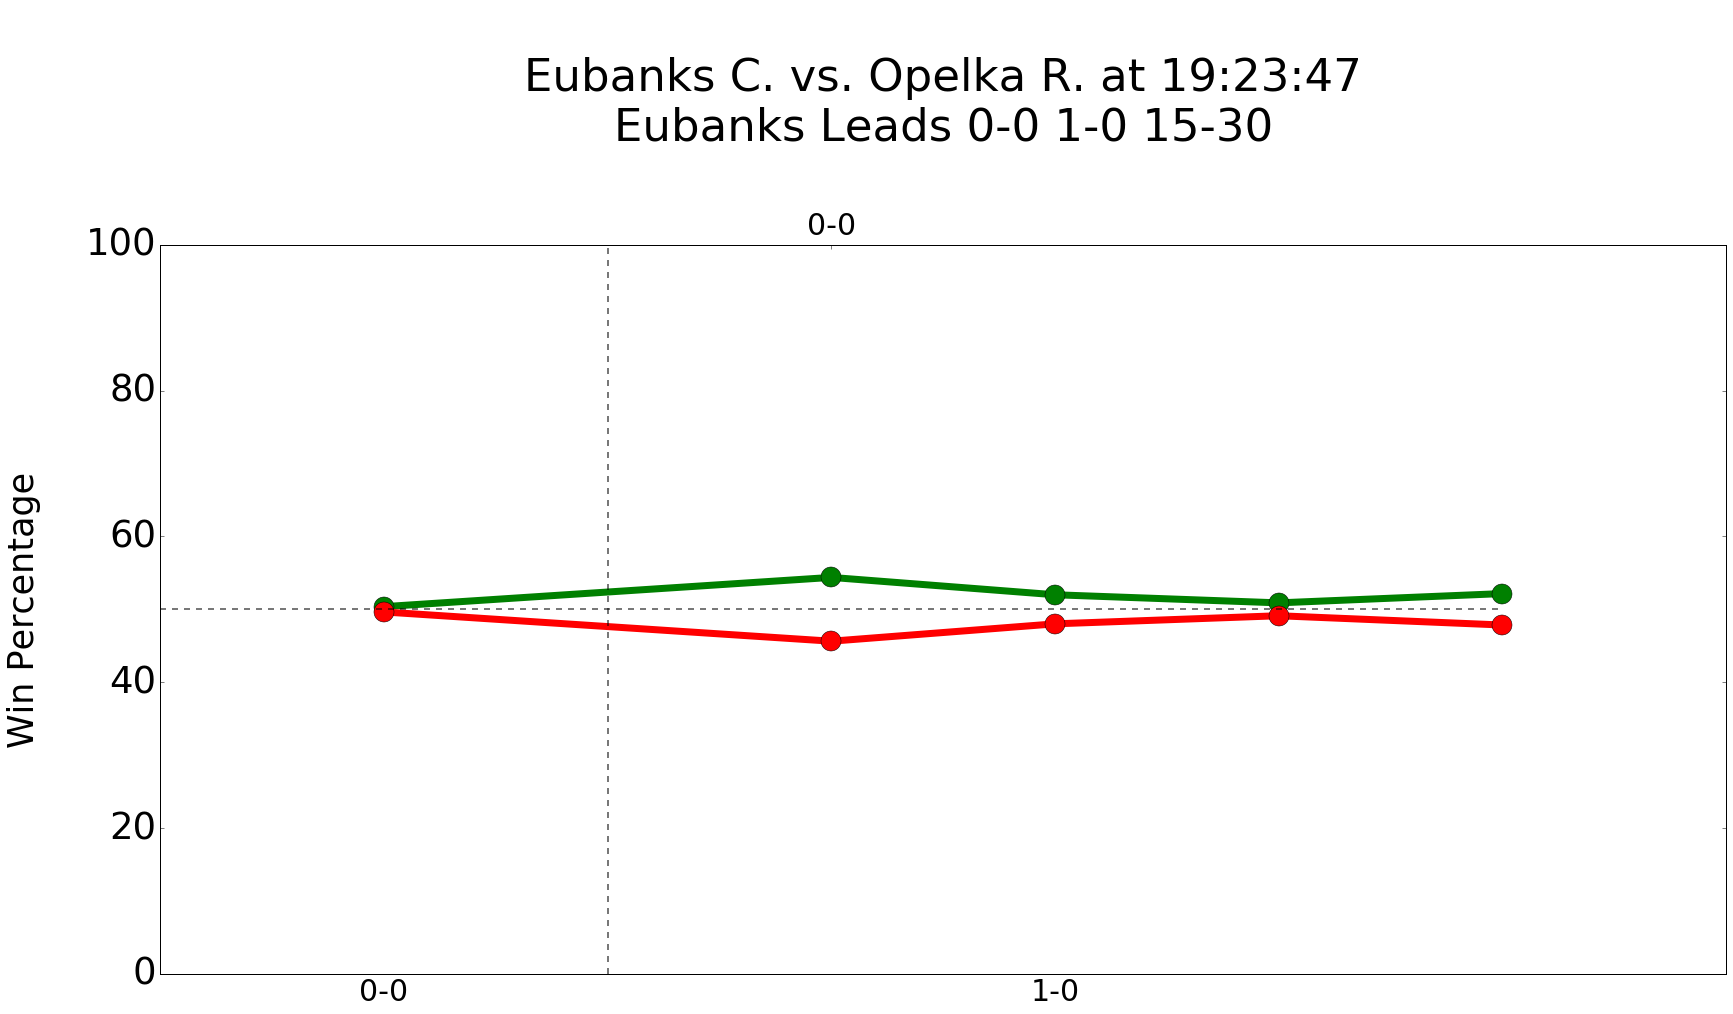

Updating Graphs
Updating Graphs
Ranking Not Found for Player 1 - assume ranking 100+
Data Setup Complete
Base Prob: 0.504291851642
New Prob: 51.0168923839


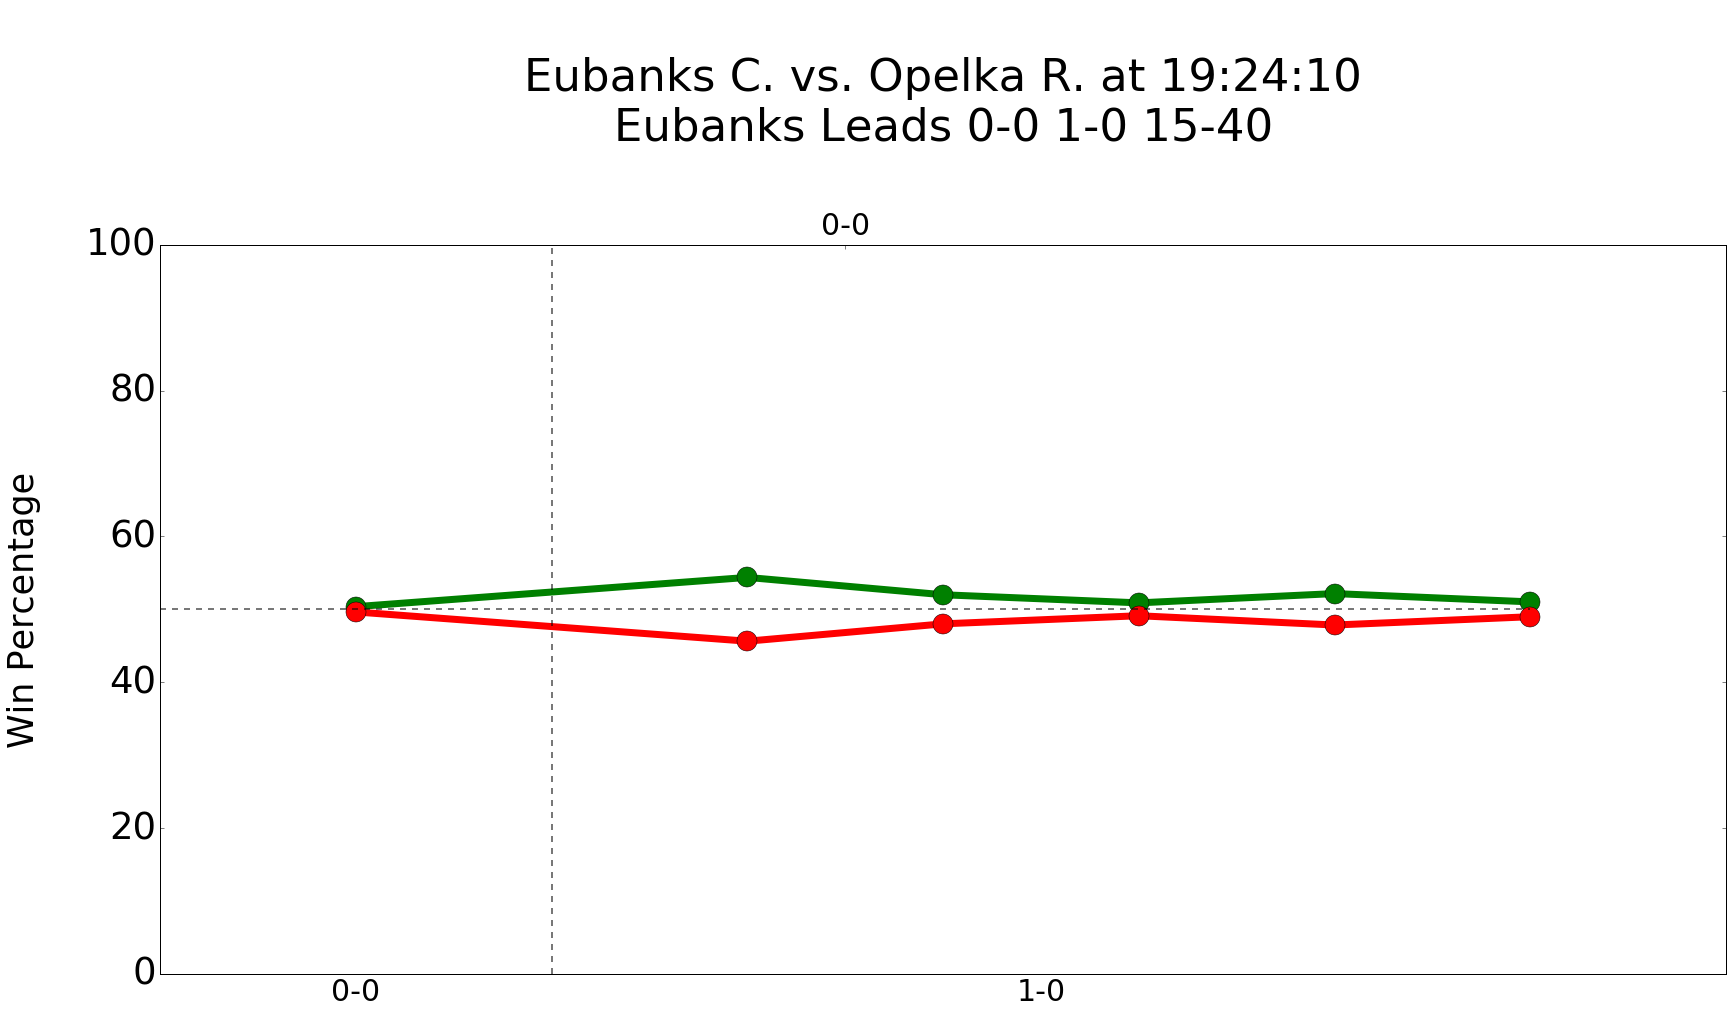

Updating Graphs
Updating Graphs


In [ ]:
track_live_scores(full_data, all_matches, (10,10,5,2,10), 15000,
                  t_data = training_data)

IndexError: list index out of range

In [346]:
a, b

(1, 2)

In [817]:
def game_win_prob(x, y, p):
    if (x,y,p) in game_data:
        return game_data[(x,y,p)]
    w = p**2/(1.-2*p*(1-p))
    if (x == 4 and y <= 2):
        return 1.
    elif (x <= 2 and y == 4):
        return 0.
    elif x >= 3 and y >= 3:
        if x == y:
            results =  w
        elif x > y:
            results = p + (1.-p)*w
        elif x < y:
            results = p*w
        game_data[(x,y,p)] = w
        game_data[(x+1,y,p)] = p + (1.-p)*w
        game_data[(x,y+1,p)] = p*w
        return results
    else:
        results = game_win_prob(x+1, y, p) * p + game_win_prob(x, y+1, p) * (1-p)
        game_data[(x,y,p)] = results
        return results

In [818]:
def set_win_prob(x, y, s_game, r_game, s_pt, r_pt, final_score = None, win = 1 ):
    if (x, y, s_pt, r_pt, final_score, win) in set_data:
        return set_data[(x, y, s_pt, r_pt, final_score, win)]
    
    if final_score == None:
        if (x == 6 and y <= 4) or (x == 7):
            return win
        elif (x <= 4 and y == 6) or (y == 7):
            return 1.-win
    elif final_score == 'odd' and win:
        if (x == 6 and y <= 4) or (x == 7):
            if (x+y) % 2 == 1:
                return 1.
            else:
                return 0.
        elif (x <= 4 and y == 6) or (y == 7):
            return 0.
    elif final_score == 'odd' and 1.-win:
        if (x <= 4 and y == 6) or (y == 7):
            if (x+y) % 2 == 1:
                return 1.
            else:
                return 0.
        elif (x == 6 and y <= 4) or (x == 7):
            return 0.
    elif final_score == 'even' and win:
        if (x == 6 and y <= 4) or (x == 7):
            if (x+y) % 2 == 0:
                return 1.
            else:
                return 0.
        elif (x <= 4 and y == 6) or (y == 7):
            return 0.
    elif final_score == 'even' and 1.-win:
        if (x <= 4 and y == 6) or (y == 7):
            if (x+y) % 2 == 0:
                return 1.
            else:
                return 0.
        elif (x == 6 and y <= 4) or (x == 7):
            return 0.
    
    if (x == 6 and y == 6):
        results = tiebreak_win_prob(0,0, s_pt, r_pt) * set_win_prob(x+1, y,s_game,r_game, 
                                                                 s_pt, r_pt, final_score = final_score, win=win) + \
               (1.-tiebreak_win_prob(0,0, s_pt, r_pt)) * set_win_prob(x, y+1, s_game,r_game, 
                                                                      s_pt, r_pt, final_score = final_score, win=win)
    else:
        results = set_win_prob(y+1, x, 1.-r_game, 1.-s_game, 1.-r_pt, 
                            1.-s_pt, final_score = final_score, win = 1.-win) * (1-s_game) + \
               set_win_prob(y, x+1, 1.-r_game, 1.-s_game, 1.-r_pt, 
                            1.-s_pt, final_score = final_score, win = 1.-win) * s_game
    
    set_data[(x, y, s_pt, r_pt, final_score, win)] = results
    return results

In [822]:
def tiebreak_win_prob(x, y, s, r):
    if (x,y,s,r) in tiebreak_data:
        return tiebreak_data[(x,y,s,r)]
    
    w = (s*r)/(1-(s*(1.-r)+(1.-s)*r))   
    if (x == 7 and y <= 5):
        return 1.
    elif (x <= 5 and y == 7):
        return 0.
    elif x >= 6 and y >= 6:
        if x == y:
            results = w
        elif x > y:
            if (x+y) % 4 == 1:
                results = r + (1.-r)*w
            else:
                results = s + (1.-s)*w
        elif x < y:
            if (x+y) % 4 == 1:
                results = r*w
            else:
                results = s*w
        tiebreak_data[(x,y,s,r)] = w
        tiebreak_data[(x+1,y,s,r)] = r + (1.-r)*w
        tiebreak_data[(x,y+1,s,r)] = r*w
        tiebreak_data[(x+1,y+1,s,r)] = w
        tiebreak_data[(x+2,y+1,s,r)] = s + (1.-s)*w
        tiebreak_data[(x+1,y+2,s,r)] = s*w
            
    elif (x+y) % 4 == 0 or (x+y) % 4 == 3:
        results = tiebreak_win_prob(x, y+1,s,r) * (1.-s) + tiebreak_win_prob(x+1, y,s,r) * s
    elif (x+y) % 4 == 1 or (x+y) % 4 == 2:
        results = tiebreak_win_prob(x, y+1,s,r) * (1.-r) + tiebreak_win_prob(x+1, y,s,r) * r
    tiebreak_data[(x,y,s,r)] = results
    return results

In [940]:
def win_prob(s1, s2, g1, g2, p1, p2, s_pt, r_pt):
    if (s1, s2, g1, g2, p1, p2, s_pt, r_pt) in match_data:
        return match_data[(s1, s2, g1, g2, p1, p2, s_pt, r_pt)]
    
    if s1 == 2 and s2 < 2:
        return 1.
    elif s1 < 2 and s2 == 2:
        return 0.
    
    if g1 == 6 and g2 == 6:
        first_set_win_odd = tiebreak_win_prob(p1,p2,s_pt, r_pt)
        first_set_loss_odd = 1.-tiebreak_win_prob(p1,p2,s_pt,r_pt)
        first_set_win_even, first_set_loss_even = 0.,0.
    else:    
        s_game, r_game = game_win_prob(0,0,s_pt), game_win_prob(0,0,r_pt)

        first_game_win = game_win_prob(p1, p2, s_pt)

        first_set_loss_odd = first_game_win * set_win_prob(g2, g1+1, 1.-r_game, 1.-s_game, 1.-r_pt, 1.-s_pt,
                                                           final_score = 'odd', win = 1) + \
                             (1.-first_game_win) * set_win_prob(g2+1, g1, 1.-r_game, 1.-s_game, 1.-r_pt, 1.-s_pt,
                                                                final_score = 'odd', win = 1)

        first_set_loss_even = first_game_win * set_win_prob(g2, g1+1, 1.-r_game, 1.-s_game, 1.-r_pt, 1.-s_pt,
                                                           final_score = 'even', win = 1) + \
                             (1.-first_game_win) * set_win_prob(g2+1, g1, 1.-r_game, 1.-s_game, 1.-r_pt, 1.-s_pt,
                                                                final_score = 'even', win = 1)

        first_set_win_odd = first_game_win * set_win_prob(g2, g1+1, 1.-r_game, 1.-s_game, 1.-r_pt, 1.-s_pt,
                                                           final_score = 'odd', win = 0) + \
                             (1.-first_game_win) * set_win_prob(g2+1, g1, 1.-r_game, 1.-s_game, 1.-r_pt, 1.-s_pt,
                                                                final_score = 'odd', win = 0)

        first_set_win_even = first_game_win * set_win_prob(g2, g1+1, 1.-r_game, 1.-s_game, 1.-r_pt, 1.-s_pt,
                                                           final_score = 'even', win = 0) + \
                             (1.-first_game_win) * set_win_prob(g2+1, g1, 1.-r_game, 1.-s_game, 1.-r_pt, 1.-s_pt,
                                                                final_score = 'even', win = 0)

        #print 'Odds: ' + str(first_set_loss_odd + first_set_loss_even + first_set_win_odd + first_set_win_even)

    if (g1+g2) % 2 == 0:
        results = first_set_loss_odd * (1.-win_prob(s2+1, s1, 0, 0, 0, 0, 1.-r_pt, 1.-s_pt)) + \
                   first_set_loss_even * win_prob(s1, s2+1, 0, 0, 0, 0, s_pt, r_pt) + \
                   first_set_win_odd * (1.-win_prob(s2, s1+1, 0, 0, 0, 0, 1.-r_pt, 1.-s_pt)) + \
                   first_set_win_even * win_prob(s1+1, s2, 0, 0, 0, 0, s_pt, r_pt)
    else:
        results = first_set_loss_even * (1.-win_prob(s2+1, s1, 0, 0, 0, 0, 1.-r_pt, 1.-s_pt)) + \
                   first_set_loss_odd * win_prob(s1, s2+1, 0, 0, 0, 0, s_pt, r_pt) + \
                   first_set_win_even * (1.-win_prob(s2, s1+1, 0, 0, 0, 0, 1.-r_pt, 1.-s_pt)) + \
                   first_set_win_odd * win_prob(s1+1, s2, 0, 0, 0, 0, s_pt, r_pt)
        match_data[(s1, s2, g1, g2, p1, p2, s_pt, r_pt)] = results
    return results
    

In [861]:
game_data, set_data, tiebreak_data, match_data = dict(), dict(), dict(), dict()
grid_data = []
s_base, r_base, inc, lim = 0.65, 0.35, 0.005, 0.1
for s in np.arange(s_base - lim, s_base + lim + inc, inc):
    print s
    for r in np.arange(r_base - 0.1, r_base + 0.11, 0.005):
        grid_data.append([s, r, win_prob(0,0,0,0,0,0,s,r)])
grid_data = pd.DataFrame(grid_data, columns = ['Serve Win %', 'Return Win %', 'Win %'])

0.55
0.555
0.56
0.565
0.57
0.575
0.58
0.585
0.59
0.595
0.6
0.605
0.61
0.615
0.62
0.625
0.63
0.635
0.64
0.645
0.65
0.655
0.66
0.665
0.67
0.675
0.68
0.685
0.69
0.695
0.7
0.705
0.71
0.715
0.72
0.725
0.73
0.735
0.74
0.745
0.75


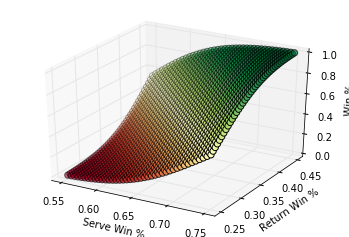

In [862]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(grid_data['Serve Win %'], grid_data['Return Win %'], grid_data['Win %'],
           c = grid_data['Win %'], cmap = 'RdYlGn', s = 40)
ax.set_xlim(0.54, 0.76)
ax.set_ylim(0.24, 0.46)
ax.set_zlim(-0.01, 1.01)
ax.set_xlabel('Serve Win %')
ax.set_ylabel('Return Win %')
ax.set_zlabel('Win %')

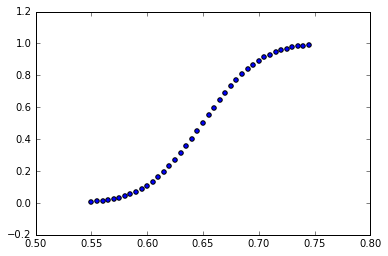

In [863]:
rowidx = np.arange(0, 41*41, 43)
subset_data = grid_data.loc[rowidx]
plt.scatter(subset_data['Serve Win %'], subset_data['Win %'])

In [864]:
def get_win_prob(match_prob, grid_x, grid_y):
    grid_x = grid_x.values
    grid_y = grid_y.values
    idx = min([i for i,y in enumerate(grid_y) if y >= match_prob])
    s_win = grid_x[idx-1] + (grid_x[idx] - grid_x[idx-1]) * (match_prob - grid_y[idx-1])/(grid_y[idx] - grid_y[idx-1])
    return s_win, s_win - 0.3

In [880]:
def transform_pt(p1):
    pt_dict = {'0': 0, '15':1, '30':2, '40':3, 'AD':4}
    return pt_dict[p1]

In [997]:
def transform_pt_t(p1, p2):
    print p1, p2
    p1 = p1.split(' (')[0]
    p2 = p2.split(' (')[0]
    if int(p1) + int(p2) >= 12:
        if int(p1) + int(p2) % 4 == 0:
            return 6,6
        elif int(p1) + int(p2) % 4 == 2:
            return 7,7
        elif int(p1) + int(p2) % 4 == 1 and int(p1) > int(p2):
            return 7,6
        elif int(p1) + int(p2) % 4 == 1 and int(p1) < int(p2):
            return 6,7
        elif int(p1) + int(p2) % 4 == 3 and int(p1) > int(p2):
            return 8,7
        elif int(p1) + int(p2) % 4 == 3 and int(p1) < int(p2):
            return 7,8
    else:
        return int(p1), int(p2)

In [932]:
def master_win_prob(s1, s2, g1, g2, p1, p2, match_win):
    if g1 == 6 and g2 == 6:
        p1, p2 = transform_pt_t(p1,p2)
    else:
        p1, p2 = transform_pt(p1), transform_pt(p2)
    s, r = get_win_prob(match_win, subset_data['Serve Win %'], subset_data['Win %'])
    return win_prob(s1, s2, g1, g2, p1, p2,s,r)

In [942]:
master_win_prob(1,0,6,6,'5','1 (S)',0.5)

0.97295735937500005

In [874]:
matchup_groups = ['1.0','2.0','3.0','4.0','5-10','11-20','21-50','51-100','Outside Top 100']
matchup_grid = [[0.50, 0.65, 0.70, 0.75, 0.80, 0.85, 0.93, 0.97, 0.98],
                [0.35, 0.50, 0.60, 0.73, 0.77, 0.83, 0.90, 0.95, 0.97],
                [0.30, 0.40, 0.50, 0.70, 0.73, 0.80, 0.85, 0.90, 0.96],
                [0.25, 0.27, 0.30, 0.50, 0.70, 0.75, 0.80, 0.85, 0.95],
                [0.20, 0.23, 0.27, 0.30, 0.50, 0.70, 0.75, 0.80, 0.90],
                [0.15, 0.17, 0.20, 0.25, 0.30, 0.50, 0.60, 0.70, 0.80],
                [0.07, 0.10, 0.15, 0.20, 0.25, 0.40, 0.50, 0.60, 0.70],
                [0.03, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50, 0.60],
                [0.02, 0.03, 0.04, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]]
matchup_grid = pd.DataFrame(matchup_grid, columns = matchup_groups, index = matchup_groups)

In [875]:
matchup_grid

,1.0,2.0,3.0,4.0,5-10,11-20,21-50,51-100,Outside Top 100
1.0,0.50,0.65,0.70,0.75,0.80,0.85,0.93,0.97,0.98
2.0,0.35,0.50,0.60,0.73,0.77,0.83,0.90,0.95,0.97
3.0,0.30,0.40,0.50,0.70,0.73,0.80,0.85,0.90,0.96
4.0,0.25,0.27,0.30,0.50,0.70,0.75,0.80,0.85,0.95
5-10,0.20,0.23,0.27,0.30,0.50,0.70,0.75,0.80,0.90
11-20,0.15,0.17,0.20,0.25,0.30,0.50,0.60,0.70,0.80
21-50,0.07,0.10,0.15,0.20,0.25,0.40,0.50,0.60,0.70
51-100,0.03,0.05,0.10,0.15,0.20,0.30,0.40,0.50,0.60
Outside Top 100,0.02,0.03,0.04,0.05,0.10,0.20,0.30,0.40,0.50


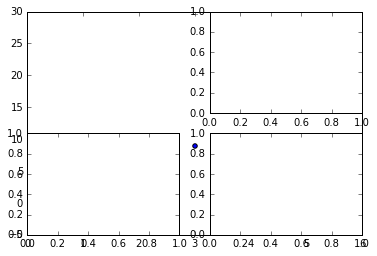

In [971]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)   #top left
fig.add_subplot(222)   #top right
fig.add_subplot(223)   #bottom left
fig.add_subplot(224)   #bottom right 
ax.scatter(x, y)
plt.show()

In [1002]:
from PIL import Image

def concatenate_images():
    date = str(datetime.today().strftime('%Y-%m-%d'))
    png_files = glob.glob("Scraped Matches/" + date + "*.png")

    new_im = Image.new('RGB', (800,400*len(png_files)))
    
    for i,png_file in enumerate(png_files):
        im = Image.open(png_file)
        im.thumbnail((800,400))
        new_im.paste(im, (0,400*i))

    new_im.save("Scraped Matches/Live_Scoreboard.png")
    

In [990]:
concatenate_images()